Quick Data!
---

Now, as a "fun" exercise, we're just going to go quickly through some of the stuff we covered earlier to demonstrate how Python, Pandas, NumPy and MatPlotLib can work together. I don't know how you spend your evenings, but me? I like to check out datasets on data.gov!

Standard library imports...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here's a simple CSV file showing some power usage for zip codes over time. I've added the URL in case the file gets corrupted. Please feel free to download your own, though the column and row names (not to mention Series and DataFrame sizes may be different).

In [3]:
pd.read_csv?

In [4]:
# http://catalog.data.gov/dataset/average-monthly-residential-energy-usage-by-zip-code-0487d
power_data = pd.read_csv(r'Average_monthly_residential_energy_usage_By_zip_code.csv',header=0)
power_data.columns.values

array(['FY 05/06', 'FY 06/07', 'FY 07/08', 'FY 08/09', 'FY 09/10',
       'FY 10/11', 'FY 11/12', 'FY 12/13', 'Location 1'], dtype=object)

This is here to remind us to look at the inline documentation for `pd.read_csv`.

In [5]:
# pd.read_csv?

Looking at the data in the column 'Location 1'. It's weirdly formatted, where it appears that there is a zip code, followed by some coordinates. 

In [6]:
power_data.ix[0,'Location 1']

'90058\r\n(34.00184426500044, -118.22112680399971)'

We're not really interested in the coordinates (today), so let's grab what is presumably a zip code. We could use regular expressions, but since we're only ever looking at the first five characters, a simple slice will do.

In [7]:
power_data['Location 1'] = power_data['Location 1'].str[:5]

In [8]:
power_data = power_data.set_index('Location 1')

In [9]:
power_data = power_data.sort_index()

We'll change the index name to something more informative than 'Location 1'

In [10]:
power_data.index.name = 'Zip Code'

Now, let's talk about `pd.date_range()`. This is a very powerful function within Pandas for creating ranges of dates.

In [11]:
# pd.date_range?

By default, `pd.date_range()` assumes a daily frequency:

In [12]:
pd.date_range(start='01-01-2005',end='01-10-2005')

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10'],
              dtype='datetime64[ns]', freq='D')

in the information output, there's a *freq='D'*. This means that the frequency is 'Daily'. We could use other codes, such as 'A' for __A__nnually, 'M' for __M__onthly, or even 'H' for __H__ourly.

In [13]:
pd.date_range(start='01-01-2005',end='08-10-2005',freq='M')

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31'],
              dtype='datetime64[ns]', freq='M')

We can even specify when we want the repetition to occur. Below, we're using 'AS-JAN'. This means the frequency is __A__nnual,  __S__tarting on __JAN__uary 1st.

In [14]:
pd.date_range(start='01-01-2005',end='01-01-2012',freq='AS-JAN')

DatetimeIndex(['2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [15]:
dateColumnNames = pd.date_range(start='01-01-2005',end='01-01-2012',freq='AS-JAN')

It may seem a little repetitive to then bring it back to a string for processing, but this is largely an exercise, so we're just going to convert to a string, and just use the year for simplicity.

_NOTE: this functionality may cause an error unless you are using a current version of Pandas/NumPy._

In [25]:
# strftime.org
dateColumnNames

DatetimeIndex(['2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [17]:
power_data.columns = dateColumnNames.strftime('%Y')

In [18]:
power_data['Average'] = power_data.mean(axis=1)

In [19]:
power_data

,2005,2006,2007,2008,2009,2010,2011,2012,Average
Zip Code,,,,,,,,,
90001,334,343,345,336,336,330,329,341,336.750
90002,358,368,367,353,352,351,346,355,356.250
90003,316,323,328,321,316,313,312,317,318.250
90004,378,387,391,380,370,363,357,373,374.875
90005,320,328,326,315,313,310,307,309,316.000
90006,254,262,262,258,255,253,254,261,257.375
90007,298,306,313,305,294,275,276,285,294.000
90008,373,381,379,371,360,356,351,351,365.250
90009,370,444,490,537,202,328,276,258,363.125


In [20]:
power_data.ix[:,7].name

'2012'

In [21]:
power_data.index[0:10].values

array(['90001', '90002', '90003', '90004', '90005', '90006', '90007',
       '90008', '90009', '90010'], dtype=object)

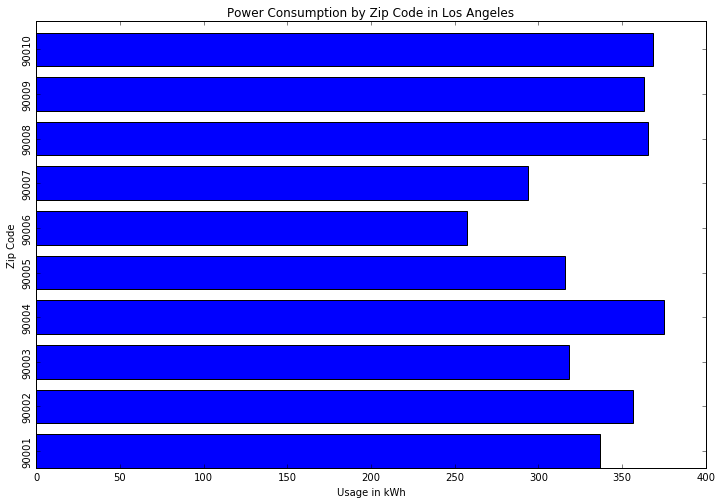

In [22]:
barWidth = .75
plt.figure(figsize=(12,8))
plt.barh(np.arange(10),power_data['Average'][0:10],barWidth)

plt.title('Power Consumption by Zip Code in Los Angeles')
plt.xlabel('Usage in kWh')
plt.ylabel('Zip Code')
plt.yticks(np.arange(10)+ (barWidth / 2),power_data.index[0:10],rotation=90);

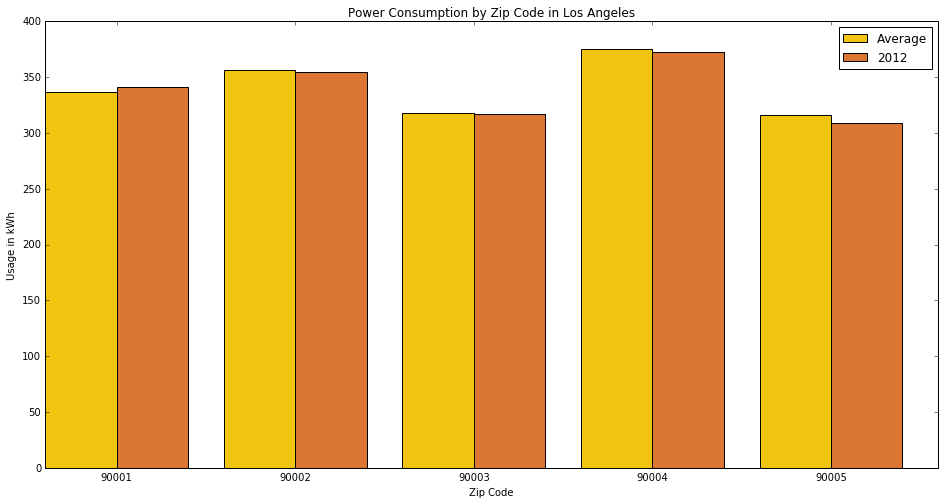

In [23]:
startZip = 0
samples = 5
endZip = startZip + samples

dataYear = '2012'

index = np.arange(samples)
powerZip = power_data.ix[startZip:endZip].index.values
barWidth = .4
powerAvg = power_data.ix[startZip:endZip,'Average'].values
powerYear = power_data.ix[startZip:endZip,dataYear].values

power_chart = plt.figure(figsize=(16,8))
power1 = plt.bar(index, powerAvg, barWidth, color='#f1c40f', label='Average')
power2 = plt.bar(index + barWidth, powerYear, barWidth, color='#dc7633', label=dataYear)
plt.xticks(index + barWidth, powerZip)
plt.title('Power Consumption by Zip Code in Los Angeles')

# don't forget to switch these, now that the bars are vertical:
plt.ylabel('Usage in kWh')
plt.xlabel('Zip Code')
plt.legend(loc=0);